In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [11]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.6433566433566433

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6317097026604068

In [14]:
kbin_age = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')
kbin_fare = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')

In [15]:
trf = ColumnTransformer([('first', kbin_age, [0]), ('second', kbin_fare, [1])])

In [16]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [17]:
trf.named_transformers_['first'].n_bins_

array([5])

In [19]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [20]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [24]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
302,19.0,1.0,0.0000,0.0,"(13.545, 25.495]",NaN
689,15.0,1.0,211.3375,3.0,"(13.545, 25.495]","(176.319, 369.927]"
696,44.0,3.0,8.0500,0.0,"(36.147, 48.333]","(0.0, 35.744]"
268,58.0,4.0,153.4625,2.0,"(48.333, 62.0]","(90.827, 176.319]"
677,18.0,1.0,9.8417,0.0,"(13.545, 25.495]","(0.0, 35.744]"


In [25]:
clf = DecisionTreeClassifier()

clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [26]:
accuracy_score(y_test, y_pred2)

0.6293706293706294

In [27]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6303208137715179


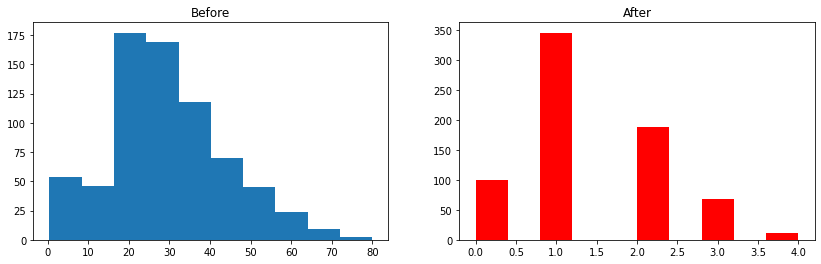

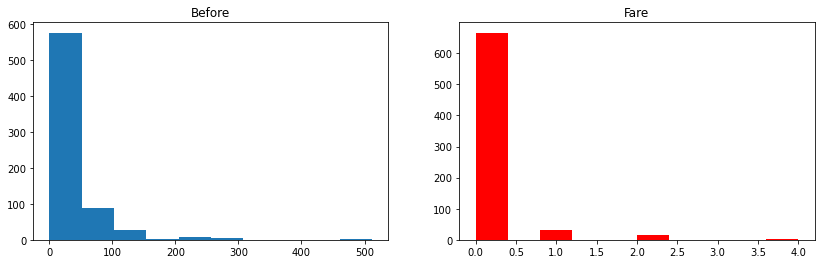

In [33]:
discretize(5,'uniform')